# Downloading Dataset from kaggle

In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600  ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download abdullahorzan/moodify-dataset

 94% 26.0M/27.7M [00:02<00:00, 14.6MB/s]
100% 27.7M/27.7M [00:02<00:00, 11.0MB/s]


In [ ]:
!unzip /content/moodify-dataset.zip

Archive:  /content/moodify-dataset.zip
  inflating: 278k_labelled_uri.csv   
  inflating: 278k_song_labelled.csv  


# Importing Necessary packages and libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn. preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score

# Importing Datasets

In [ ]:
df=pd.read_csv('/content/278k_labelled_uri.csv')
df

,Unnamed: 0.1,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels,uri
0,0,0,195000.0,0.611,0.614,-8.815,0.0672,0.01690,0.000794,0.7530,0.520,128.050,3.446154e-07,2,spotify:track:3v6sBj3swihU8pXQQHhDZo
1,1,1,194641.0,0.638,0.781,-6.848,0.0285,0.01180,0.009530,0.3490,0.250,122.985,1.464234e-07,1,spotify:track:7KCWmFdw0TzoJbKtqRRzJO
2,2,2,217573.0,0.560,0.810,-8.029,0.0872,0.00710,0.000008,0.2410,0.247,170.044,4.007850e-07,1,spotify:track:2CY92qejUrhyPUASawNVRr
3,3,3,443478.0,0.525,0.699,-4.571,0.0353,0.01780,0.000088,0.0888,0.199,92.011,7.959809e-08,0,spotify:track:11BPfwVbB7vok7KfjBeW4k
4,4,4,225862.0,0.367,0.771,-5.863,0.1060,0.36500,0.000001,0.0965,0.163,115.917,4.693131e-07,1,spotify:track:3yUJKPsjvThlcQWTS9ttYx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277933,277933,277933,276360.0,0.777,0.725,-9.012,0.0470,0.12600,0.010800,0.0917,0.851,128.349,1.700680e-07,1,spotify:track:6wLr2oR8eqUG5Beleh2Crm
277934,277934,277934,284773.0,0.543,0.482,-12.789,0.1940,0.08530,0.000092,0.1110,0.415,193.513,6.812444e-07,1,spotify:track:5mYtpXrZZ1bbGJYDGC8I0Y
277935,277935,277935,241307.0,0.527,0.942,-5.640,0.0366,0.01150,0.000000,0.1880,0.495,148.723,1.516740e-07,2,spotify:track:7FwBtcecmlpc1sLySPXeGE
277936,277936,277936,234333.0,0.768,0.829,-5.109,0.0313,0.09640,0.000029,0.0970,0.962,118.773,1.335706e-07,1,spotify:track:2olVm1lHicpveMAo4AUDRB


In [ ]:
df1=pd.read_csv('/content/278k_song_labelled.csv')
df1

,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
0,0,195000.0,0.611,0.614,-8.815,0.0672,0.01690,0.000794,0.7530,0.520,128.050,3.446154e-07,2
1,1,194641.0,0.638,0.781,-6.848,0.0285,0.01180,0.009530,0.3490,0.250,122.985,1.464234e-07,1
2,2,217573.0,0.560,0.810,-8.029,0.0872,0.00710,0.000008,0.2410,0.247,170.044,4.007850e-07,1
3,3,443478.0,0.525,0.699,-4.571,0.0353,0.01780,0.000088,0.0888,0.199,92.011,7.959809e-08,0
4,4,225862.0,0.367,0.771,-5.863,0.1060,0.36500,0.000001,0.0965,0.163,115.917,4.693131e-07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277933,277933,276360.0,0.777,0.725,-9.012,0.0470,0.12600,0.010800,0.0917,0.851,128.349,1.700680e-07,1
277934,277934,284773.0,0.543,0.482,-12.789,0.1940,0.08530,0.000092,0.1110,0.415,193.513,6.812444e-07,1
277935,277935,241307.0,0.527,0.942,-5.640,0.0366,0.01150,0.000000,0.1880,0.495,148.723,1.516740e-07,2
277936,277936,234333.0,0.768,0.829,-5.109,0.0313,0.09640,0.000029,0.0970,0.962,118.773,1.335706e-07,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277938 entries, 0 to 277937
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0.1      277938 non-null  int64  
 1   Unnamed: 0        277938 non-null  int64  
 2   duration (ms)     277938 non-null  float64
 3   danceability      277938 non-null  float64
 4   energy            277938 non-null  float64
 5   loudness          277938 non-null  float64
 6   speechiness       277938 non-null  float64
 7   acousticness      277938 non-null  float64
 8   instrumentalness  277938 non-null  float64
 9   liveness          277938 non-null  float64
 10  valence           277938 non-null  float64
 11  tempo             277938 non-null  float64
 12  spec_rate         277938 non-null  float64
 13  labels            277938 non-null  int64  
 14  uri               277938 non-null  object 
dtypes: float64(11), int64(3), object(1)
memory usage: 31.8+ MB


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277938 entries, 0 to 277937
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        277938 non-null  int64  
 1   duration (ms)     277938 non-null  float64
 2   danceability      277938 non-null  float64
 3   energy            277938 non-null  float64
 4   loudness          277938 non-null  float64
 5   speechiness       277938 non-null  float64
 6   acousticness      277938 non-null  float64
 7   instrumentalness  277938 non-null  float64
 8   liveness          277938 non-null  float64
 9   valence           277938 non-null  float64
 10  tempo             277938 non-null  float64
 11  spec_rate         277938 non-null  float64
 12  labels            277938 non-null  int64  
dtypes: float64(11), int64(2)
memory usage: 27.6 MB


checking Unnamed: 0 and Unnamed: 0.1 are equal

In [ ]:
chk_col=df['Unnamed: 0'].equals(df['Unnamed: 0.1'])
chk_col

True

In [ ]:
#dropping Unnamed: 0 , Unnamed: 0.1 and duration (ms)
#splitting into x and y

X=df.iloc[:,3:-2]
y=df.iloc[:,-2:-1]

In [ ]:
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate
0,0.611,0.614,-8.815,0.0672,0.01690,0.000794,0.7530,0.520,128.050,3.446154e-07
1,0.638,0.781,-6.848,0.0285,0.01180,0.009530,0.3490,0.250,122.985,1.464234e-07
2,0.560,0.810,-8.029,0.0872,0.00710,0.000008,0.2410,0.247,170.044,4.007850e-07
3,0.525,0.699,-4.571,0.0353,0.01780,0.000088,0.0888,0.199,92.011,7.959809e-08
4,0.367,0.771,-5.863,0.1060,0.36500,0.000001,0.0965,0.163,115.917,4.693131e-07
...,...,...,...,...,...,...,...,...,...,...
277933,0.777,0.725,-9.012,0.0470,0.12600,0.010800,0.0917,0.851,128.349,1.700680e-07
277934,0.543,0.482,-12.789,0.1940,0.08530,0.000092,0.1110,0.415,193.513,6.812444e-07
277935,0.527,0.942,-5.640,0.0366,0.01150,0.000000,0.1880,0.495,148.723,1.516740e-07
277936,0.768,0.829,-5.109,0.0313,0.09640,0.000029,0.0970,0.962,118.773,1.335706e-07


In [ ]:
y

,labels
0,2
1,1
2,1
3,0
4,1
...,...
277933,1
277934,1
277935,2
277936,1


Scaling

In [ ]:
mns=MinMaxScaler()
X_sc=mns.fit_transform(X)
X_sc

array([[0.61779575, 0.614     , 0.78889368, ..., 0.52      , 0.52276615,
        0.00577065],
       [0.64509606, 0.781     , 0.81921026, ..., 0.25      , 0.50208821,
        0.00245189],
       [0.56622851, 0.81      , 0.80100798, ..., 0.247     , 0.69420732,
        0.00671123],
       ...,
       [0.53286148, 0.942     , 0.83782867, ..., 0.495     , 0.607164  ,
        0.00253981],
       [0.77654196, 0.829     , 0.84601276, ..., 0.962     , 0.48489265,
        0.00223667],
       [0.78766431, 0.87      , 0.7222188 , ..., 0.555     , 0.41922947,
        0.00397311]])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

# Applying Machine Learning Models

# Applying Model to Train dataset

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
nb=GaussianNB()
de=DecisionTreeClassifier()
xg=XGBClassifier()

lst=[knn,nb,de,xg]
lst_name=['K-Neighbors Classifier','Naive-Bayes Classifier','Decision Tree Classifier','XGBoost Classifier']
k=0

for i in lst:
  print('*'*30,lst_name[k],'*'*30)
  k=k+1
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print('Accuracy score :',accuracy_score(y_test,y_pred)*100)
  print(classification_report(y_test,y_pred))

****************************** K-Neighbors Classifier ******************************
Accuracy score : 75.96483653546329
              precision    recall  f1-score   support

           0       0.74      0.75      0.74     24650
           1       0.75      0.77      0.76     31790
           2       0.71      0.63      0.67     14042
           3       0.87      0.90      0.89     12900

    accuracy                           0.76     83382
   macro avg       0.77      0.76      0.76     83382
weighted avg       0.76      0.76      0.76     83382

****************************** Naive-Bayes Classifier ******************************
Accuracy score : 80.12400757957353
              precision    recall  f1-score   support

           0       0.84      0.75      0.79     24650
           1       0.80      0.78      0.79     31790
           2       0.67      0.83      0.74     14042
           3       0.91      0.91      0.91     12900

    accuracy                           0.80     83382

In [ ]:
X_df1=df1.iloc[:,2:-1]
X_df1

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate
0,0.611,0.614,-8.815,0.0672,0.01690,0.000794,0.7530,0.520,128.050,3.446154e-07
1,0.638,0.781,-6.848,0.0285,0.01180,0.009530,0.3490,0.250,122.985,1.464234e-07
2,0.560,0.810,-8.029,0.0872,0.00710,0.000008,0.2410,0.247,170.044,4.007850e-07
3,0.525,0.699,-4.571,0.0353,0.01780,0.000088,0.0888,0.199,92.011,7.959809e-08
4,0.367,0.771,-5.863,0.1060,0.36500,0.000001,0.0965,0.163,115.917,4.693131e-07
...,...,...,...,...,...,...,...,...,...,...
277933,0.777,0.725,-9.012,0.0470,0.12600,0.010800,0.0917,0.851,128.349,1.700680e-07
277934,0.543,0.482,-12.789,0.1940,0.08530,0.000092,0.1110,0.415,193.513,6.812444e-07
277935,0.527,0.942,-5.640,0.0366,0.01150,0.000000,0.1880,0.495,148.723,1.516740e-07
277936,0.768,0.829,-5.109,0.0313,0.09640,0.000029,0.0970,0.962,118.773,1.335706e-07


In [ ]:
y_df1=df1.iloc[:,-1]
y_df1

0         2
1         1
2         1
3         0
4         1
         ..
277933    1
277934    1
277935    2
277936    1
277937    1
Name: labels, Length: 277938, dtype: int64

# Applying Model to Test Dataset

In [ ]:
k=0

for i in lst:
  print('*'*30,lst_name[k],'*'*30)
  k=k+1
  y_pred=i.predict(X_df1)
  print('Accuracy score :',accuracy_score(y_df1,y_pred)*100)
  print(classification_report(y_df1,y_pred))

****************************** K-Neighbors Classifier ******************************
Accuracy score : 83.70895667379055
              precision    recall  f1-score   support

           0       0.82      0.83      0.82     82058
           1       0.83      0.85      0.84    106429
           2       0.82      0.74      0.78     47065
           3       0.91      0.93      0.92     42386

    accuracy                           0.84    277938
   macro avg       0.84      0.84      0.84    277938
weighted avg       0.84      0.84      0.84    277938

****************************** Naive-Bayes Classifier ******************************
Accuracy score : 80.10059797508798
              precision    recall  f1-score   support

           0       0.84      0.75      0.79     82058
           1       0.80      0.78      0.79    106429
           2       0.67      0.83      0.74     47065
           3       0.90      0.91      0.91     42386

    accuracy                           0.80    277938

In [ ]:
y_train.value_counts()

labels
1         74639
0         57408
2         33023
3         29486
dtype: int64

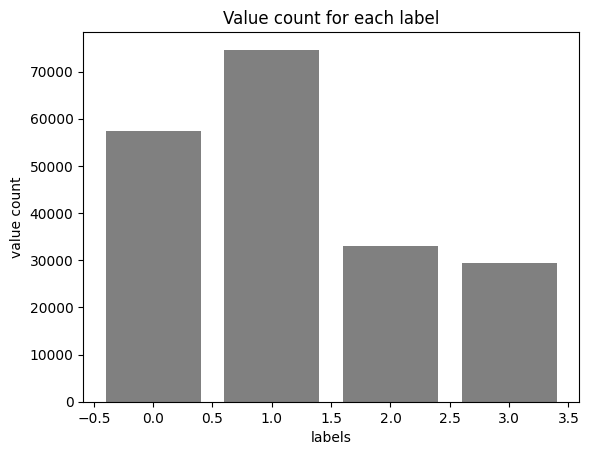

In [ ]:
a=[1,0,2,3]
b=[74639,57408,33023,29486]
plt.bar(a,b,color='grey')
plt.xlabel('labels')
plt.ylabel('value count')
plt.title('Value count for each label')
plt.show()

# **Over Sampling**

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
os=SMOTE(random_state=1)
X_train_os,y_train_os=os.fit_resample(X_train,y_train)

In [ ]:
y_train_os.value_counts()

labels
0         74639
1         74639
2         74639
3         74639
dtype: int64

In [ ]:
knn_os=KNeighborsClassifier(n_neighbors=3)
nb_os=GaussianNB()
de_os=DecisionTreeClassifier()
xg_os=XGBClassifier()

lst=[knn_os,nb_os,de_os,xg_os]
k=0

for i in lst:
  print('*'*20,lst_name[k],'*'*20)
  k=k+1
  i.fit(X_train_os,y_train_os)
  y_pred_os=i.predict(X_df1)
  print(accuracy_score(y_df1,y_pred_os)*100)
  print(classification_report(y_df1,y_pred_os))

******************** K-Neighbors Classifier ********************
84.30585238434472
              precision    recall  f1-score   support

           0       0.84      0.84      0.84     82058
           1       0.89      0.77      0.83    106429
           2       0.74      0.89      0.81     47065
           3       0.89      0.97      0.93     42386

    accuracy                           0.84    277938
   macro avg       0.84      0.87      0.85    277938
weighted avg       0.85      0.84      0.84    277938

******************** Naive-Bayes Classifier ********************
77.9663090329498
              precision    recall  f1-score   support

           0       0.83      0.76      0.79     82058
           1       0.82      0.70      0.76    106429
           2       0.60      0.88      0.71     47065
           3       0.90      0.91      0.90     42386

    accuracy                           0.78    277938
   macro avg       0.79      0.81      0.79    277938
weighted avg       0

# **Under Sampling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
us=RandomUnderSampler(random_state=1)
X_train_us,y_train_us=us.fit_resample(X_train,y_train)

In [ ]:
knn_us=KNeighborsClassifier()
nb_us=GaussianNB()
de_us=DecisionTreeClassifier()
xg_us=XGBClassifier()

lst=[knn_us,nb_us,de_us,xg_us]
k=0

for i in lst:
  print('*'*20,lst_name[k],'*'*20)
  k=k+1
  i.fit(X_train_us,y_train_us)
  y_pred_us=i.predict(X_df1)
  print(accuracy_score(y_df1,y_pred_us)*100)
  print(classification_report(y_df1,y_pred_us))

******************** K-Neighbors Classifier ********************
76.60629348991502
              precision    recall  f1-score   support

           0       0.77      0.75      0.76     82058
           1       0.81      0.68      0.74    106429
           2       0.64      0.81      0.72     47065
           3       0.82      0.95      0.88     42386

    accuracy                           0.77    277938
   macro avg       0.76      0.80      0.78    277938
weighted avg       0.77      0.77      0.76    277938

******************** Naive-Bayes Classifier ********************
78.29587893702912
              precision    recall  f1-score   support

           0       0.84      0.75      0.80     82058
           1       0.82      0.70      0.76    106429
           2       0.60      0.88      0.71     47065
           3       0.89      0.93      0.91     42386

    accuracy                           0.78    277938
   macro avg       0.79      0.82      0.79    277938
weighted avg       

In [ ]:
y_train_us.value_counts()

labels
0         29486
1         29486
2         29486
3         29486
dtype: int64

# **PCA**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=9,random_state=1)
X_train_pca=pca.fit_transform(X_train)
X_df1_pca=pca.transform(X_df1)

In [ ]:
X_train_pca

array([[ 6.13392399e-01, -7.36945534e-01,  5.72086341e-02, ...,
         2.46470523e-01, -1.86285547e-01, -2.27590656e-03],
       [-3.69305109e+01, -7.68800608e+00, -3.16470109e-01, ...,
        -8.22934028e-02, -1.00094039e-02, -2.97916972e-02],
       [-2.22529714e+01, -2.30459250e-01, -2.84754023e-01, ...,
         4.50270412e-02, -4.76134707e-02, -7.71893148e-02],
       ...,
       [-2.80485910e+01, -4.24353243e+00, -1.71857227e-01, ...,
         2.05374281e-01, -1.74922762e-01,  4.27593726e-01],
       [-1.54730889e+00, -4.30260392e+00, -2.44939213e-01, ...,
        -8.05425623e-02,  3.18676536e-02, -1.33569773e-01],
       [-2.13531702e+01,  2.16970228e+00, -3.30126691e-01, ...,
        -1.59695897e-01, -4.61188147e-02, -2.38540701e-03]])

In [ ]:
pca.explained_variance_ratio_

array([9.56795961e-01, 4.28675848e-02, 1.08231376e-04, 8.70221039e-05,
       6.43380772e-05, 3.15792439e-05, 2.15744282e-05, 1.38937084e-05,
       9.81542957e-06])

In [ ]:
knn_pca=KNeighborsClassifier(n_neighbors=3)
nb_pca=GaussianNB()
de_pca=DecisionTreeClassifier()
xg_pca=XGBClassifier()

lst=[knn_pca,nb_pca,de_pca,xg_pca]
k=0

for i in lst:
  print('*'*30,lst_name[k],'*'*30)
  k=k+1
  i.fit(X_train_pca,y_train)
  y_pred_pca=i.predict(X_df1_pca)
  print('Accuracy score :',accuracy_score(y_df1,y_pred_pca)*100)
  print(classification_report(y_df1,y_pred_pca))

****************************** K-Neighbors Classifier ******************************
Accuracy score : 83.70895667379055
              precision    recall  f1-score   support

           0       0.82      0.83      0.82     82058
           1       0.83      0.85      0.84    106429
           2       0.82      0.74      0.78     47065
           3       0.91      0.93      0.92     42386

    accuracy                           0.84    277938
   macro avg       0.84      0.84      0.84    277938
weighted avg       0.84      0.84      0.84    277938

****************************** Naive-Bayes Classifier ******************************
Accuracy score : 77.59896091934172
              precision    recall  f1-score   support

           0       0.83      0.69      0.75     82058
           1       0.74      0.83      0.78    106429
           2       0.70      0.68      0.69     47065
           3       0.86      0.91      0.89     42386

    accuracy                           0.78    277938

# Accuracy score Comparison

knn=0,nb=1,de=2,xg=3


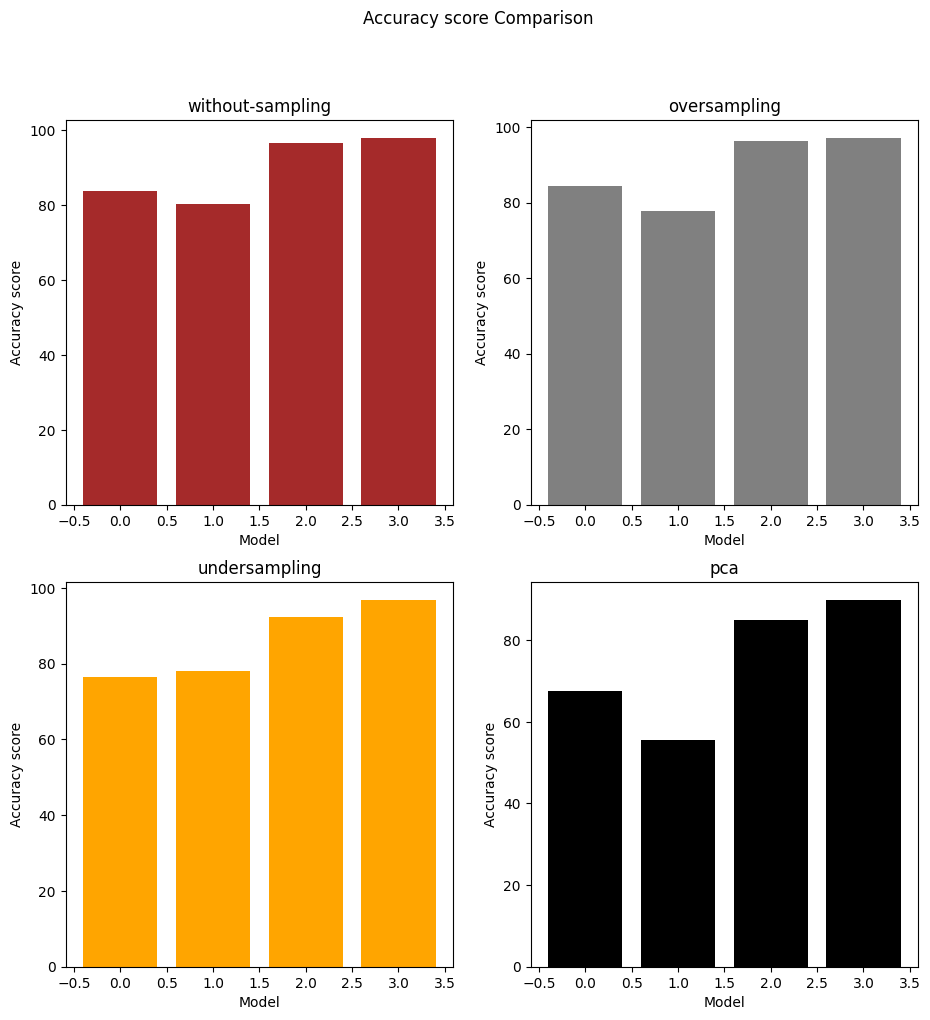

In [ ]:

print('knn=0,nb=1,de=2,xg=3')
plt.figure(figsize=(11,11))


c=[0,1,2,3]
d=[83.7,80.1,96.6,97.8]
plt.subplot(2,2,1)
plt.bar(c,d,color='brown')
plt.xlabel('Model')
plt.ylabel('Accuracy score')
plt.title('without-sampling')


c1=[0,1,2,3]
d1=[84.3,77.9,96.4,97.1]
plt.subplot(2,2,2)
plt.bar(c1,d1,color='grey')
plt.xlabel('Model')
plt.ylabel('Accuracy score')
plt.title('oversampling')


c2=[0,1,2,3]
d2=[76.6,78.2,92.2,96.8]
plt.subplot(2,2,3)
plt.bar(c2,d2,color='orange')
plt.xlabel('Model')
plt.ylabel('Accuracy score')
plt.title('undersampling')


c3=[0,1,2,3]
d3=[67.5,55.5,84.9,89.8]
plt.subplot(2,2,4)
plt.bar(c3,d3,color='black')
plt.xlabel('Model')
plt.ylabel('Accuracy score')
plt.title('pca')

plt.suptitle('Accuracy score Comparison')
plt.show()